In [1]:
import os
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt

from HexDetector import hex_radius_inner_to_outer
from analysis_functions import *

set_matplotlib_style()

In [2]:
single_run_number = 320
shower_run_number = 322
# run_path = f'/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run{run_number}-Pool{pool_number}_treeParam.root'
# run_path = f'/data/akallits/Saclay_Analysis/data/data/2023_April_h4/processedTrees/ParameterTrees/Run{run_number}-Pool{pool_number}_treeParam.root'
base_path = '/local/home/dn277127/Bureau/picosec/'
single_run_path = f'{base_path}run{single_run_number}_merged.root'
shower_run_path = f'{base_path}run{shower_run_number}_merged.root'

scint_num = 3
scint_vars = ['qe', 'qall', 'gpeak', 'tnaive']
scint_branches = ['srs']
scint_branches.extend([f's{scint_num}_{var}' for var in scint_vars])

In [3]:
single_tree = get_tree(single_run_path, 'Pico')
shower_tree = get_tree(shower_run_path, 'Pico')

In [4]:
df_single = get_df_branches(single_tree, scint_branches)
df_shower = get_df_branches(shower_tree, scint_branches)

<Report start=0 stop=67174 source='/local/home/dn277127/Bureau/picosec/run320_merged.root:/Pico;1'>
<Report start=0 stop=167920 source='/local/home/dn277127/Bureau/picosec/run322_merged.root:/Pico;1'>


Text(0.5, 0.9, '63.77% of events in selection')

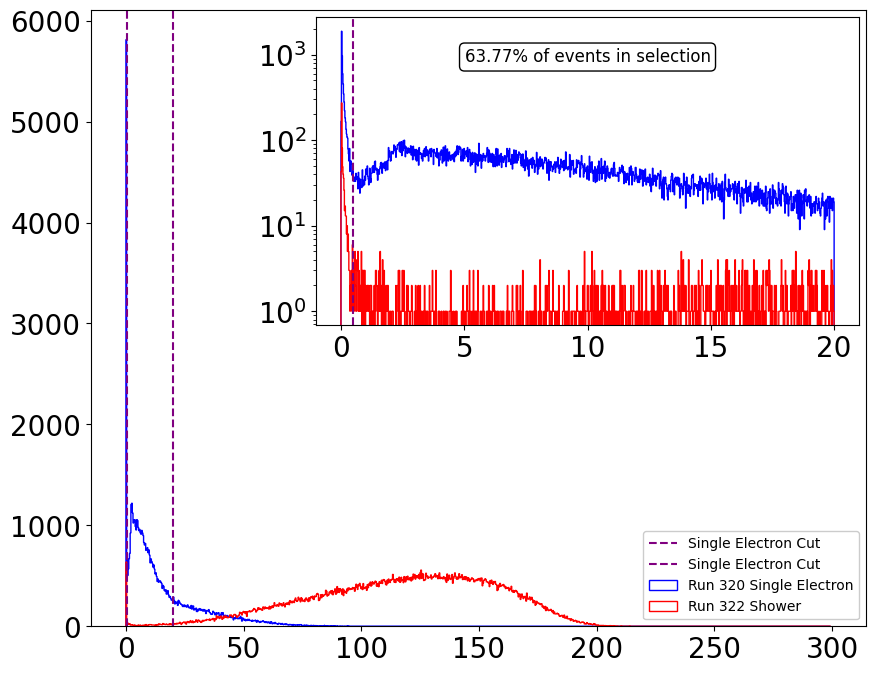

In [26]:
single_electron_cuts = [0.5, 20]
single_charge = df_single[f's{scint_num}_qall'].to_numpy()
shower_charge = df_shower[f's{scint_num}_qall'].to_numpy()
binning = np.linspace(0, np.max([np.nanmax(single_charge), np.nanmax(shower_charge)]), 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.hist(single_charge, bins=binning, histtype='step', label=f'Run {single_run_number} Single Electron', color='blue')
ax.hist(shower_charge, bins=binning, histtype='step', label=f'Run {shower_run_number} Shower', color='red')
ax.axvline(single_electron_cuts[0], color='purple', linestyle='--', label='Single Electron Cut')
ax.axvline(single_electron_cuts[1], color='purple', linestyle='--', label='Single Electron Cut')
ax.legend(loc='lower right')
ax_zoom = inset_axes(ax, width="70%", height="50%", loc='upper right')
binning_zoom = np.linspace(0, single_electron_cuts[1], 1000)
ax_zoom.hist(single_charge, bins=binning_zoom, histtype='step', label=f'Run {single_run_number} Single Electron', color='blue')
ax_zoom.hist(shower_charge, bins=binning_zoom, histtype='step', label=f'Run {shower_run_number} Shower', color='red')
ax_zoom.axvline(single_electron_cuts[0], color='purple', linestyle='--', label='Single Electron Cut')
ax_zoom.set_yscale('log')

fraction_in_selection = single_charge[(single_charge > single_electron_cuts[0]) & (single_charge < single_electron_cuts[1])].size / single_charge.size
ax_zoom.annotate(f'{fraction_in_selection:.2%} of events in selection', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))